In [ ]:
import pandas as pd
# load the training set
df_train = pd.read_csv("AMZN_train.csv")
df_train.shape

(4781, 7)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [ ]:
# the above call to describe() works only for numerical columns
# 'Date' is an object and we need to call it separately
df_train["Date"].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [ ]:
# print the time range
df_train["Date"].min(), df_train["Date"].max()

('1997-05-15', '2016-05-13')

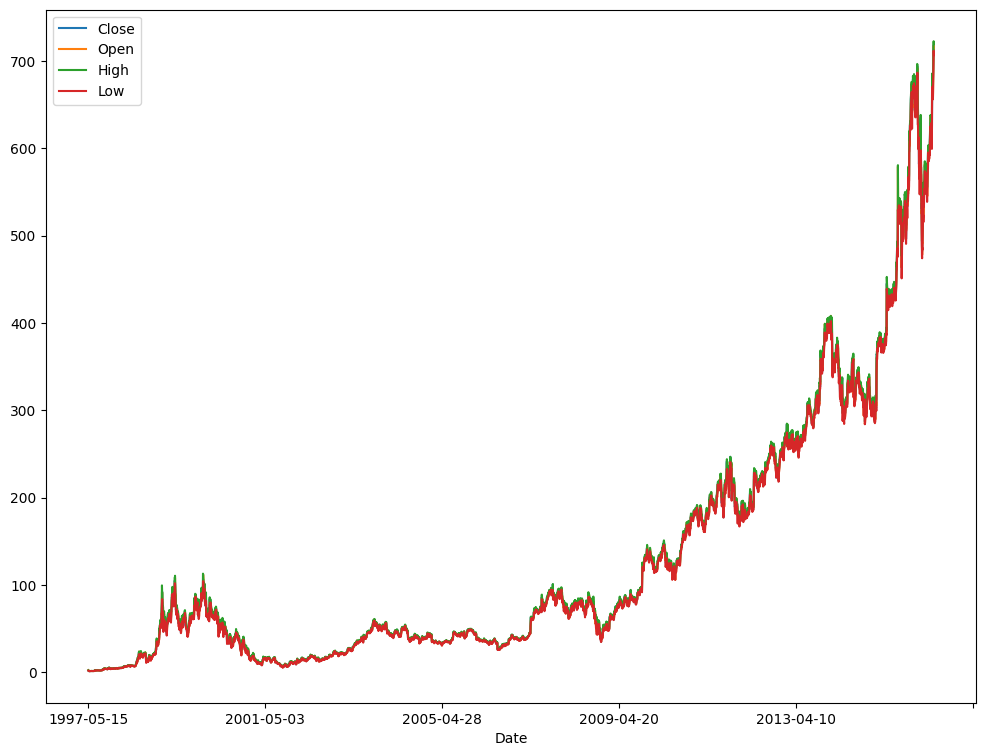

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)
_ = df_train.plot(x="Date", y=["Close", "Open", "High", "Low"])

We will repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprising errors there. 

In [ ]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

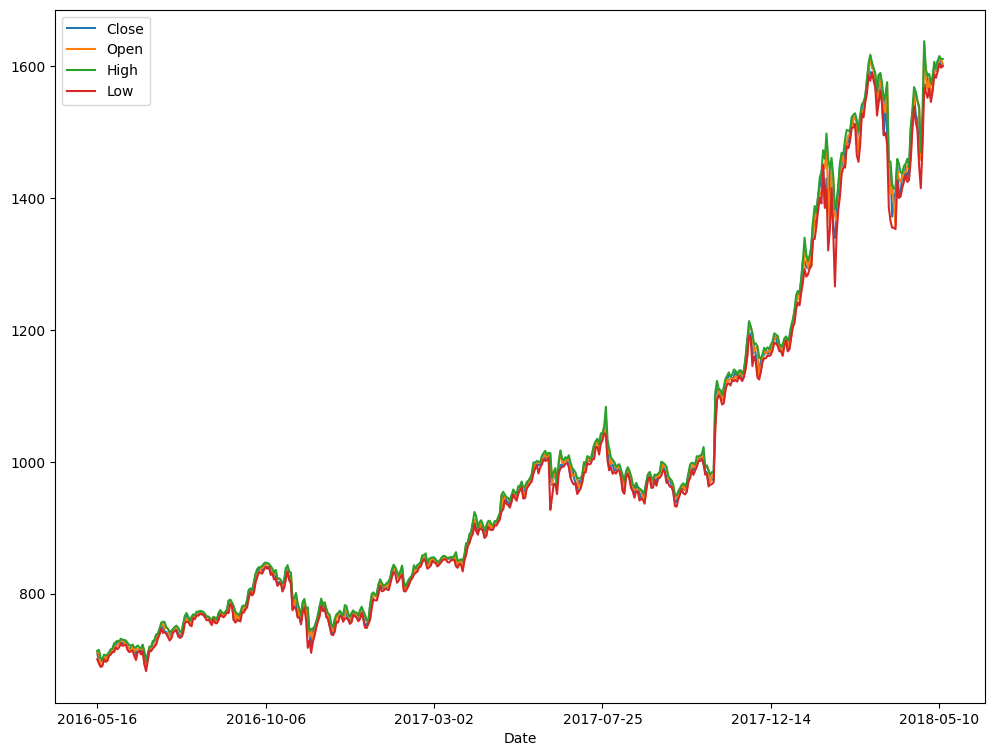

In [ ]:
# read validation and test sets and then analyse them
df_val = pd.read_csv("AMZN_val.csv")
analyse(df_val)

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  13

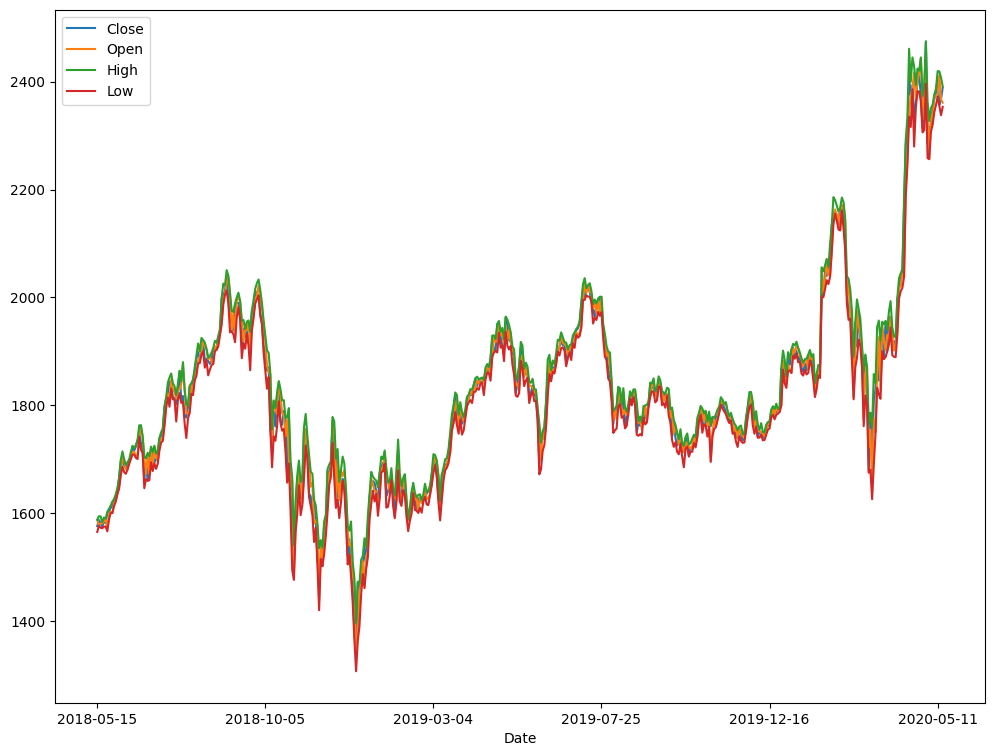

In [ ]:
df_test = pd.read_csv("AMZN_test.csv")
analyse(df_test)

After data exploration, we'll predict if the next day's closing price exceeds the opening price. This information isn't explicit in the data, so we must infer it.

We'll simply compare closing and opening prices one day ahead. First, ensure data is sorted by date using sort_values. Then, shift the DataFrame by one row/day using Pandas' shift method (with a period of -1). This returns True/False, which we'll map to 1/0 for machine learning models in a new column, "Target."

In [ ]:
# make sure that our data is sorted by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [ ]:
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


Running the value_counts method on the Target column gives us the distribution. We have 2292 days where the closing price is higher than the opening and 2389 where it is lower.

In [ ]:
df_train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

In [ ]:
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_val["Target"].value_counts()

0    255
1    248
Name: Target, dtype: int64

In [ ]:
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"].value_counts()

1    255
0    249
Name: Target, dtype: int64

**Feature Engineering**<br>
Stock prices are time-dependent, with future prices influenced by previous days' prices and other factors.

To account for values from the last n days, capturing trends or price change magnitude, we can calculate a moving average. Using Pandas' rolling method, we can perform sliding window calculations. The next cells compute 3- and 7-day moving averages and incorporate them as features in the dataset.

Ensure data is sorted by date; otherwise, rolling() method results will be invalid.

In [ ]:
df_train["Moving_Average_3"] = (df_train["Close"] - df_train["Open"]).rolling(window=3, min_periods=1).mean()
df_val["Moving_Average_3"] = (df_val["Close"] - df_val["Open"]).rolling(window=3, min_periods=1).mean()
df_test["Moving_Average_3"] = (df_test["Close"] - df_test["Open"]).rolling(window=3, min_periods=1).mean()

In [ ]:
df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()

Feature engineering can be simpler, we can just take the current day's price direction or the price range.

In [ ]:
# current price direction
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

In [ ]:
# price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

In [ ]:
df_train.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.072917,0.083333


In [ ]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]

In [ ]:
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_val[X_cols]
y_test = df_val[y_col]

**Logistic Regression**<br>
We start our modeling phase with a LogisticRegression model.

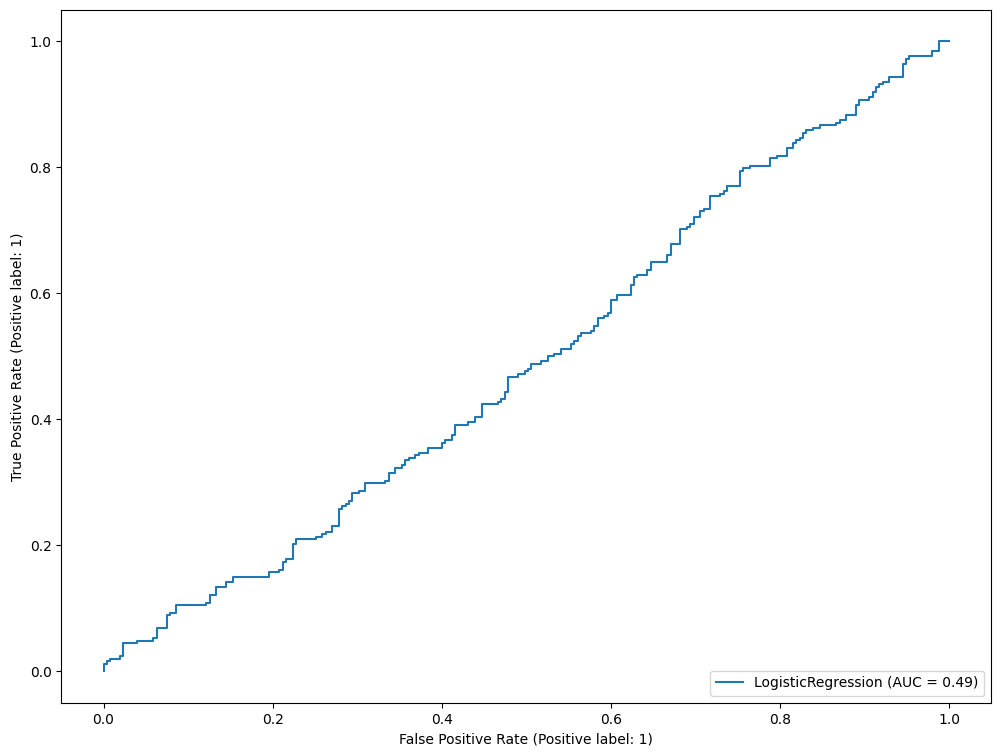

In [ ]:
# for reproducibility
RANDOM_SEED = 42

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
RocCurveDisplay.from_estimator(lr, X_val, y_val)

Logistic regression is unsuitable for this problem. An AUC < 0.5 indicates the classifier performs worse than random guesses. As this is a challenging task, any AUC > 0.5 would be acceptable.

**Decision** **Tree**

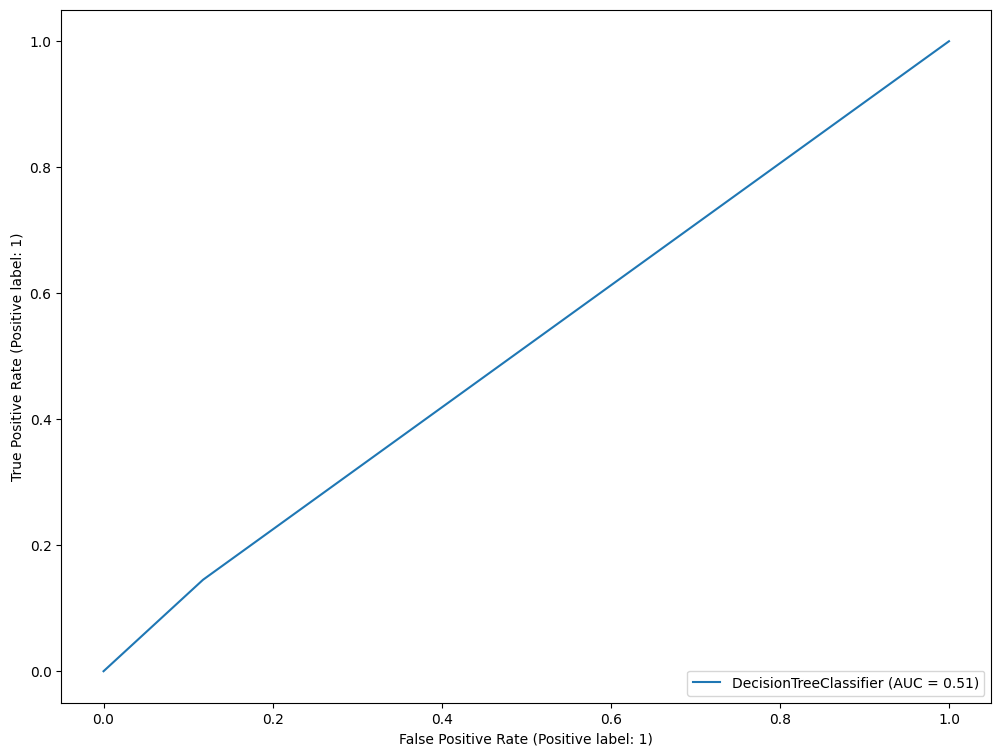

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# remember to use the random seed to be able to reproduce the same results
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

RocCurveDisplay.from_estimator(dt, X_val, y_val)

The decision tree outperforms the logistic regression model by 0.02, and its AUC is above 0.5!

**Random Forest**<br>
Now we will try to use many decision trees, i.e., a forest. Random forest is an ensemble model that builds multiple decision trees, each with a different (random) sub-set of attributes.

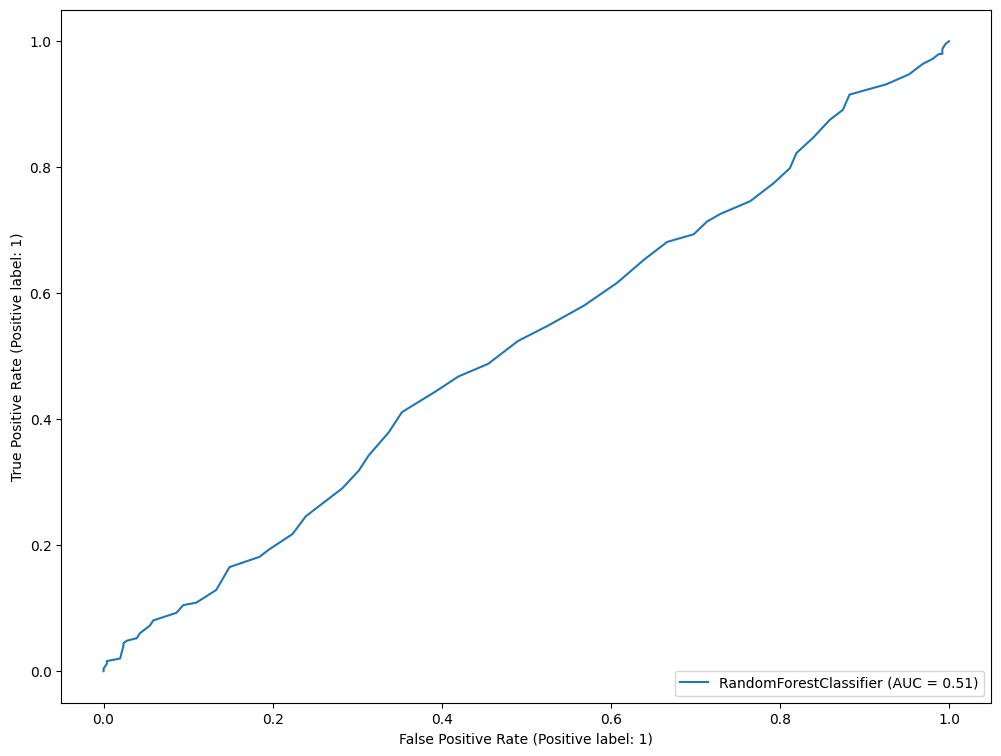

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

RocCurveDisplay.from_estimator(rf, X_val, y_val)

Contrary to our expectations, the model does not outperform the decision tree, it actually performs the same.

**Gradient Boosting Ensemble**

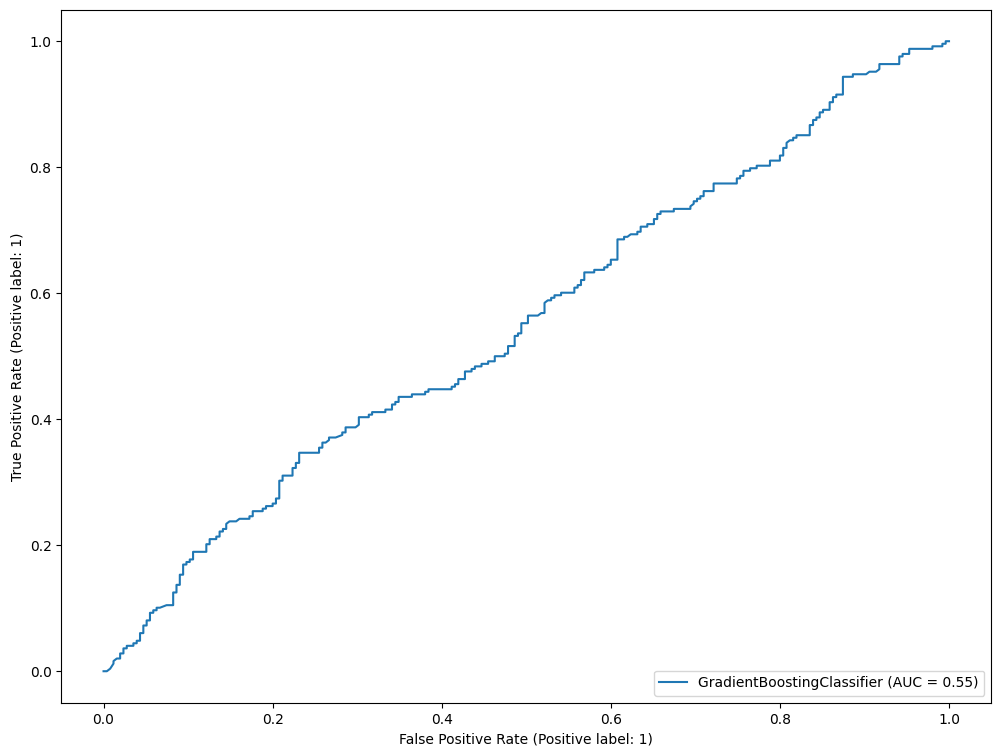

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

RocCurveDisplay.from_estimator(gb, X_val, y_val)

Indeed, the gradient boosting classifier surpasses previous models with a 0.55 AUC!

Gradient boosting is most effective for this dataset. In the following section, we'll train a deep learning model, aiming to exceed the established baseline of AUC = 0.55.

In [ ]:
import tensorflow as tf

# set seed for reproducibility of results
tf.random.set_seed(RANDOM_SEED)

print("Tensorflow version", tf.__version__)

Tensorflow version 2.12.0


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [ ]:
# this configures the model's loss function, weight optimizer, and metrics to keep track of
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

We'll train the model for 50 epochs, monitoring its loss (binary_crossentropy) and AUC values throughout each epoch.

To avoid overfitting, we'll utilize two callbacks: (1) learning rate scheduler, and (2) early stopping callback.

In [ ]:
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [ ]:
# the model.fit(...) method returns a 'history' object with stats about the training
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50
150/150 [==============================] - 2s 5ms/step - loss: 138.7588 - auc: 0.5022 - val_loss: 1.0681 - val_auc: 0.4916 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 2.6870 - auc: 0.4988 - val_loss: 0.6976 - val_auc: 0.4894 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 1.7279 - auc: 0.4958 - val_loss: 0.7621 - val_auc: 0.5081 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 1.5568 - auc: 0.4982 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 1.1847 - auc: 0.4990 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 1.0725 - auc: 0.5035 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 1.2354 - auc: 0.5038 - val_loss: 0.6931 - val_auc:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 192
Trainable params: 171
Non-trainable params: 21
_______________________________________________________

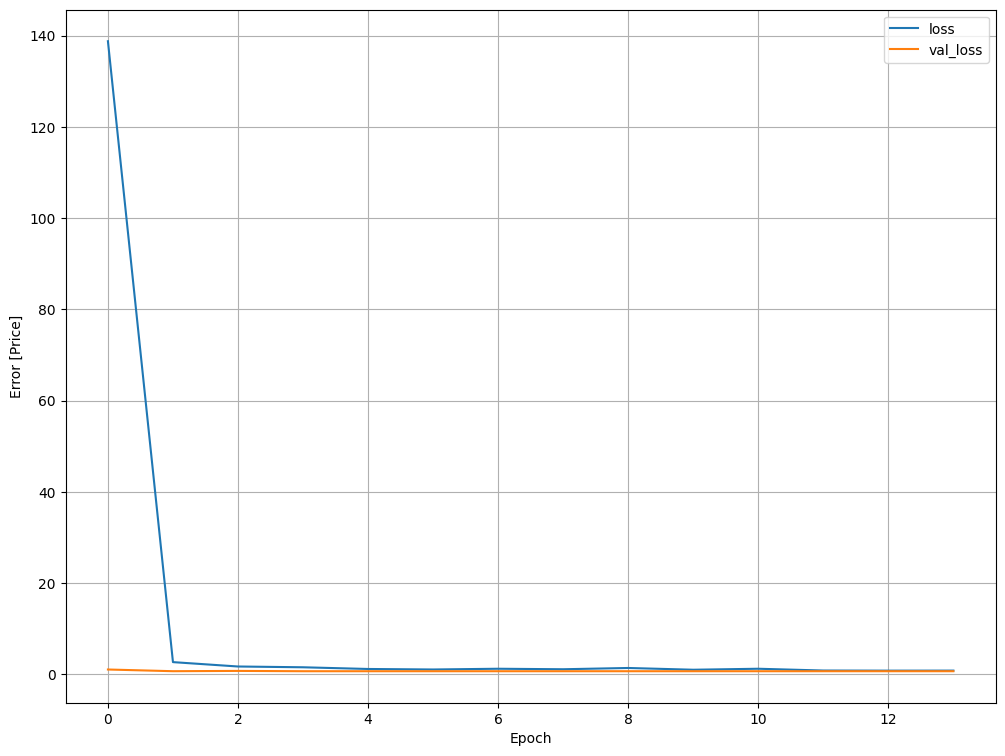

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

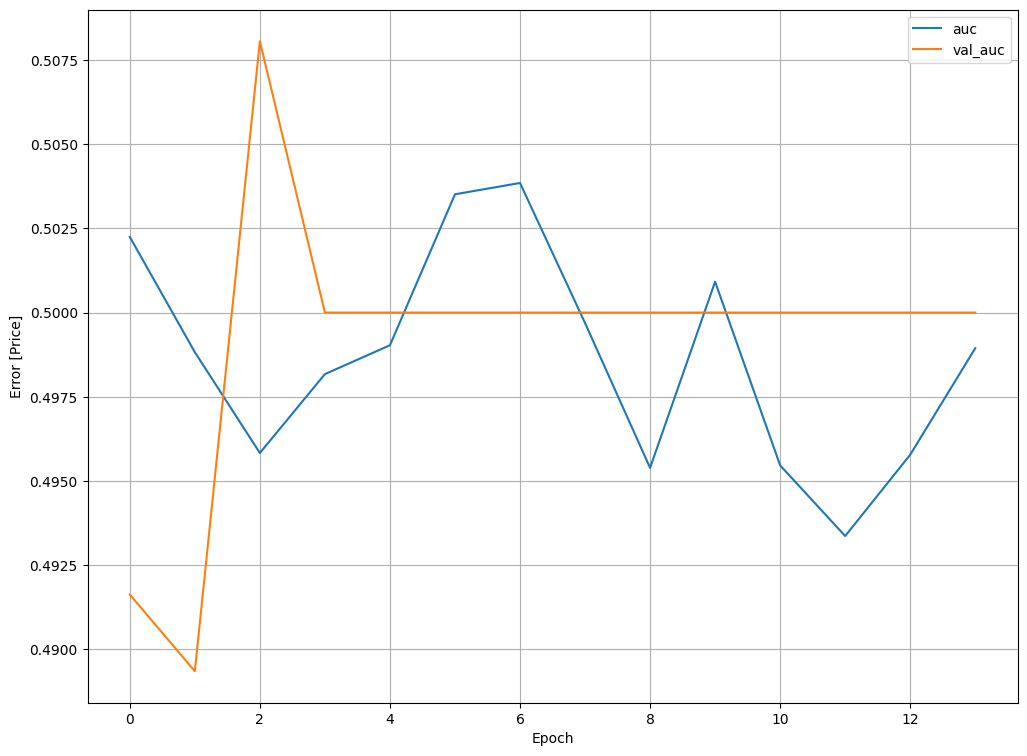

In [ ]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

**Conclusion**<br>
The gradient boosting classifier provided the best AUC score on the validation set.The feature importance plot shows the importance of each feature in regard to the predictive performance of the model (the higher the value the more important the feature is for determining the value of the target variable).

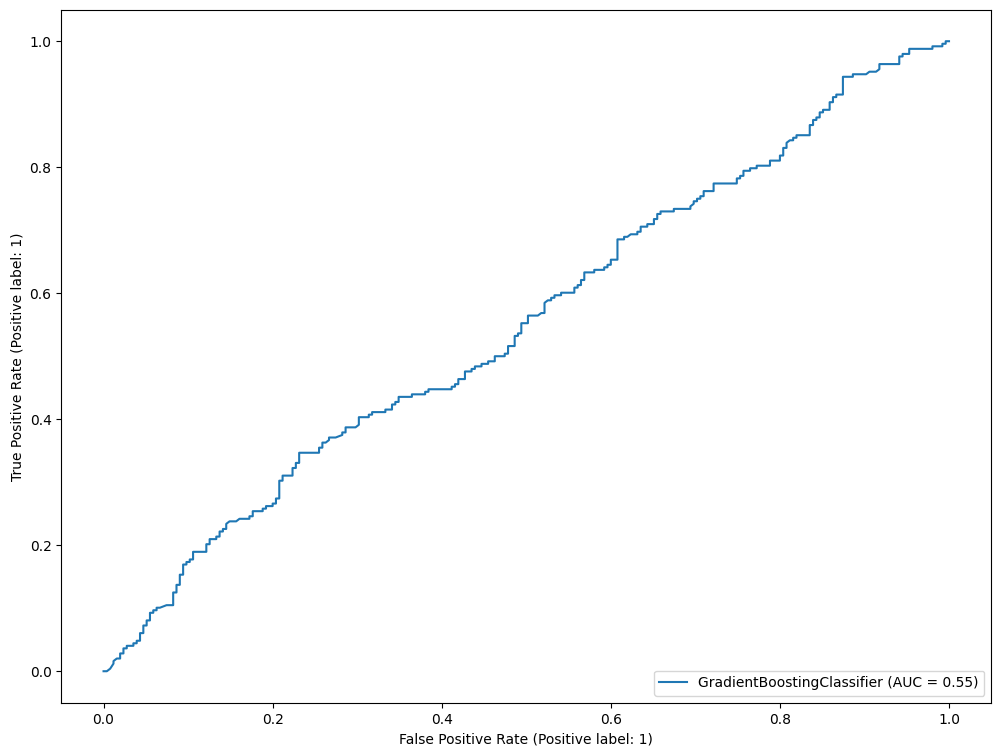

In [ ]:
RocCurveDisplay.from_estimator(gb, X_test, y_test)

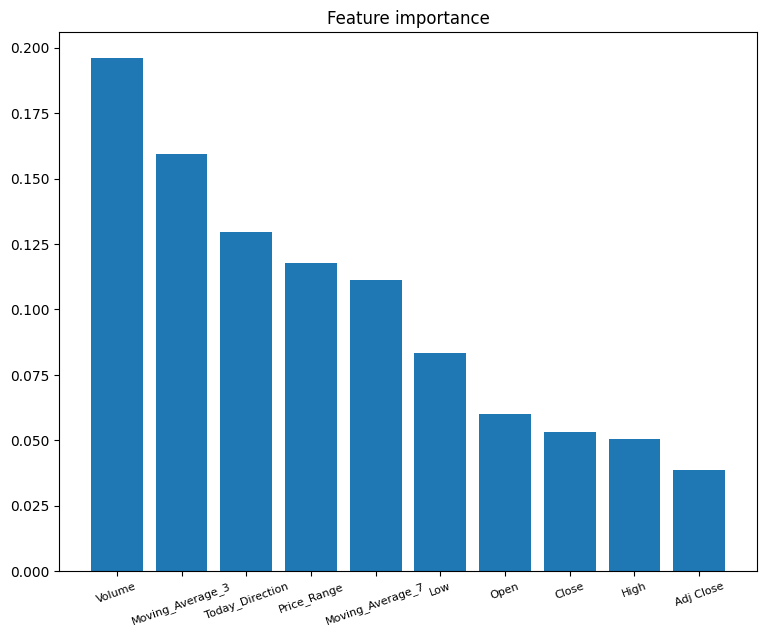

In [ ]:
import numpy as np
# Calculate feature importances
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)